In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

In [5]:
df_train = pd.read_csv('SalaryData_Train.csv')
df_test = pd.read_csv('SalaryData_Test.csv')

In [6]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
df_train.shape

(30161, 14)

In [9]:
df_test.shape

(15060, 14)

In [10]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [13]:
salary = df_train['Salary'].value_counts().reset_index()
salary.iplot(kind='bar', x="Salary", y="count", color="dodgerblue")

In [14]:
salary = df_train.groupby(['sex', 'Salary'])['sex'].count().reset_index(name='count')
salary.iplot(kind='bar', x=['sex', 'Salary'], y='count', color="dodgerblue")

In [15]:
df_train['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [16]:
df_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
le = LabelEncoder()
df_train['workclass'] = le.fit_transform(df_train['workclass'])
df_train['education'] = le.fit_transform(df_train['education'])
df_train['maritalstatus'] = le.fit_transform(df_train['maritalstatus'])
df_train['occupation'] = le.fit_transform(df_train['occupation'])
df_train['relationship'] = le.fit_transform(df_train['relationship'])
df_train['race'] = le.fit_transform(df_train['race'])
df_train['sex'] = le.fit_transform(df_train['sex'])
df_train['native'] = le.fit_transform(df_train['native'])
df_train['Salary'] = le.fit_transform(df_train['Salary'])

In [18]:
df_test['workclass'] = le.fit_transform(df_test['workclass'])
df_test['education'] = le.fit_transform(df_test['education'])
df_test['maritalstatus'] = le.fit_transform(df_test['maritalstatus'])
df_test['occupation'] = le.fit_transform(df_test['occupation'])
df_test['relationship'] = le.fit_transform(df_test['relationship'])
df_test['race'] = le.fit_transform(df_test['race'])
df_test['sex'] = le.fit_transform(df_test['sex'])
df_test['native'] = le.fit_transform(df_test['native'])
df_test['Salary'] = le.fit_transform(df_test['Salary'])

In [19]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int64
 2   education      30161 non-null  int64
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int64
 5   occupation     30161 non-null  int64
 6   relationship   30161 non-null  int64
 7   race           30161 non-null  int64
 8   sex            30161 non-null  int64
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int64
 13  Salary         30161 non-null  int64
dtypes: int64(14)
memory usage: 3.2 MB


In [21]:
x_train = df_train.iloc[:, :-1]
x_test = df_test.iloc[:, :-1]

In [22]:
y_train = df_train[['Salary']]
y_test = df_test[['Salary']]

In [23]:
y_train.head(1)

,Salary
0,0


### Naive Bayes

In [24]:
nb = GaussianNB()

In [25]:
modelNB = nb.fit(x_train, y_train)

In [26]:
pred = modelNB.predict(x_test)

In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



In [28]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.7946879150066402

### Logistics Regression

In [29]:
lr = LogisticRegression()
modelLR = lr.fit(x_train, y_train)

In [30]:
pred = modelLR.predict(x_test)

In [31]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     11360
           1       0.65      0.42      0.51      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.67      0.69     15060
weighted avg       0.79      0.80      0.79     15060



### Random Forest

In [32]:
modelRF = RandomForestClassifier(n_estimators=200, max_features=10)
modelRF.fit(x_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=200)

In [33]:
pred = modelRF.predict(x_test)
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     11360
           1       0.70      0.63      0.66      3700

    accuracy                           0.84     15060
   macro avg       0.79      0.77      0.78     15060
weighted avg       0.84      0.84      0.84     15060



### Increse Performance

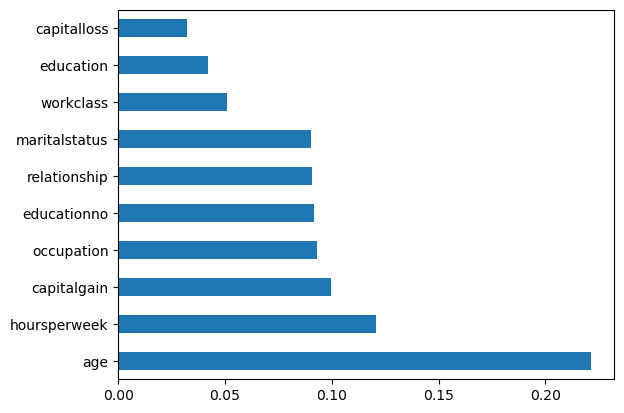

In [34]:
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [35]:
x_train = x_train[['sex', 'education', 'workclass', 'maritalstatus', 'occupation', 'educationno', 'relationship', 'capitalgain', 'hoursperweek', 'age']]
x_test = x_test[['sex', 'education', 'workclass', 'maritalstatus', 'occupation', 'educationno', 'relationship', 'capitalgain', 'hoursperweek', 'age']]

### Increse Performance Naive Bayes

In [36]:
nb = GaussianNB()
modelNB = nb.fit(x_train, y_train)
pred = modelNB.predict(x_test)

In [37]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.75      0.28      0.40      3700

    accuracy                           0.80     15060
   macro avg       0.78      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



### Increse Performance Random Forest

In [38]:
modelRF = RandomForestClassifier(n_estimators=150, max_features=5)
modelRF.fit(x_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=150)

In [39]:
pred = modelRF.predict(x_test)
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11360
           1       0.68      0.61      0.64      3700

    accuracy                           0.83     15060
   macro avg       0.78      0.76      0.77     15060
weighted avg       0.83      0.83      0.83     15060

